In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 28.1 MB/s eta 0:00:00


In [2]:
import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

display.clear_output()
!yolo mode = checks

Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 765, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/opt/conda/lib/python3.10/site-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'track', 'train', 'benchmark', 'predict', 'export'}.

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'detect', 'obb', 'segment', 'pose'}
                MODE (required) is one of {'val', 'track', 'train', 'benchmark', 'predict', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all AR

In [3]:
model = YOLO("yolo11x.pt")  # load a pretrained model (recommended for training)

100%|██████████| 109M/109M [00:01<00:00, 85.7MB/s] 


In [5]:
model = YOLO("yolo11l.pt")

100%|██████████| 49.0M/49.0M [00:00<00:00, 350MB/s]


In [4]:
results = model.train(data="/kaggle/input/traffic-detection-project/data.yaml", epochs=3, imgsz = 640)
metrics = model.val()

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/kaggle/input/traffic-detection-project/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 37.8MB/s]
2024-10-28 11:21:28,413	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-28 11:21:29,256	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 170MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-detection-project/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:33<00:00, 173.23it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:03<00:00, 181.22it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      16.6G      1.265      1.028      1.122        208        640: 100%|██████████| 363/363 [10:38<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]

                   all        549       6270      0.713      0.645      0.703      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3        16G      1.216     0.8145      1.094        201        640: 100%|██████████| 363/363 [10:31<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:18<00:00,  1.04s/it]

                   all        549       6270      0.712      0.641      0.707      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      16.1G      1.137     0.7104      1.053        166        640: 100%|██████████| 363/363 [10:29<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:18<00:00,  1.03s/it]

                   all        549       6270       0.82       0.78       0.84      0.571



3 epochs completed in 0.549 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 464 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:20<00:00,  1.12s/it]


                   all        549       6270      0.819       0.78       0.84       0.57
               bicycle        189        250      0.892       0.76      0.856      0.616
                   bus         81        108      0.818      0.843      0.877      0.695
                   car        520       3842       0.87      0.906      0.942      0.699
             motorbike        331       1238      0.808      0.773      0.836      0.504
                person        196        832       0.71      0.618      0.688      0.339
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 464 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<00:00, 703.69it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:21<00:00,  1.64it/s]


                   all        549       6270      0.819       0.78      0.839      0.571
               bicycle        189        250      0.891       0.76      0.856      0.615
                   bus         81        108      0.817      0.843      0.877      0.697
                   car        520       3842      0.869      0.906      0.942        0.7
             motorbike        331       1238      0.811      0.775      0.837      0.504
                person        196        832      0.705      0.617      0.684      0.339
Speed: 0.2ms preprocess, 31.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


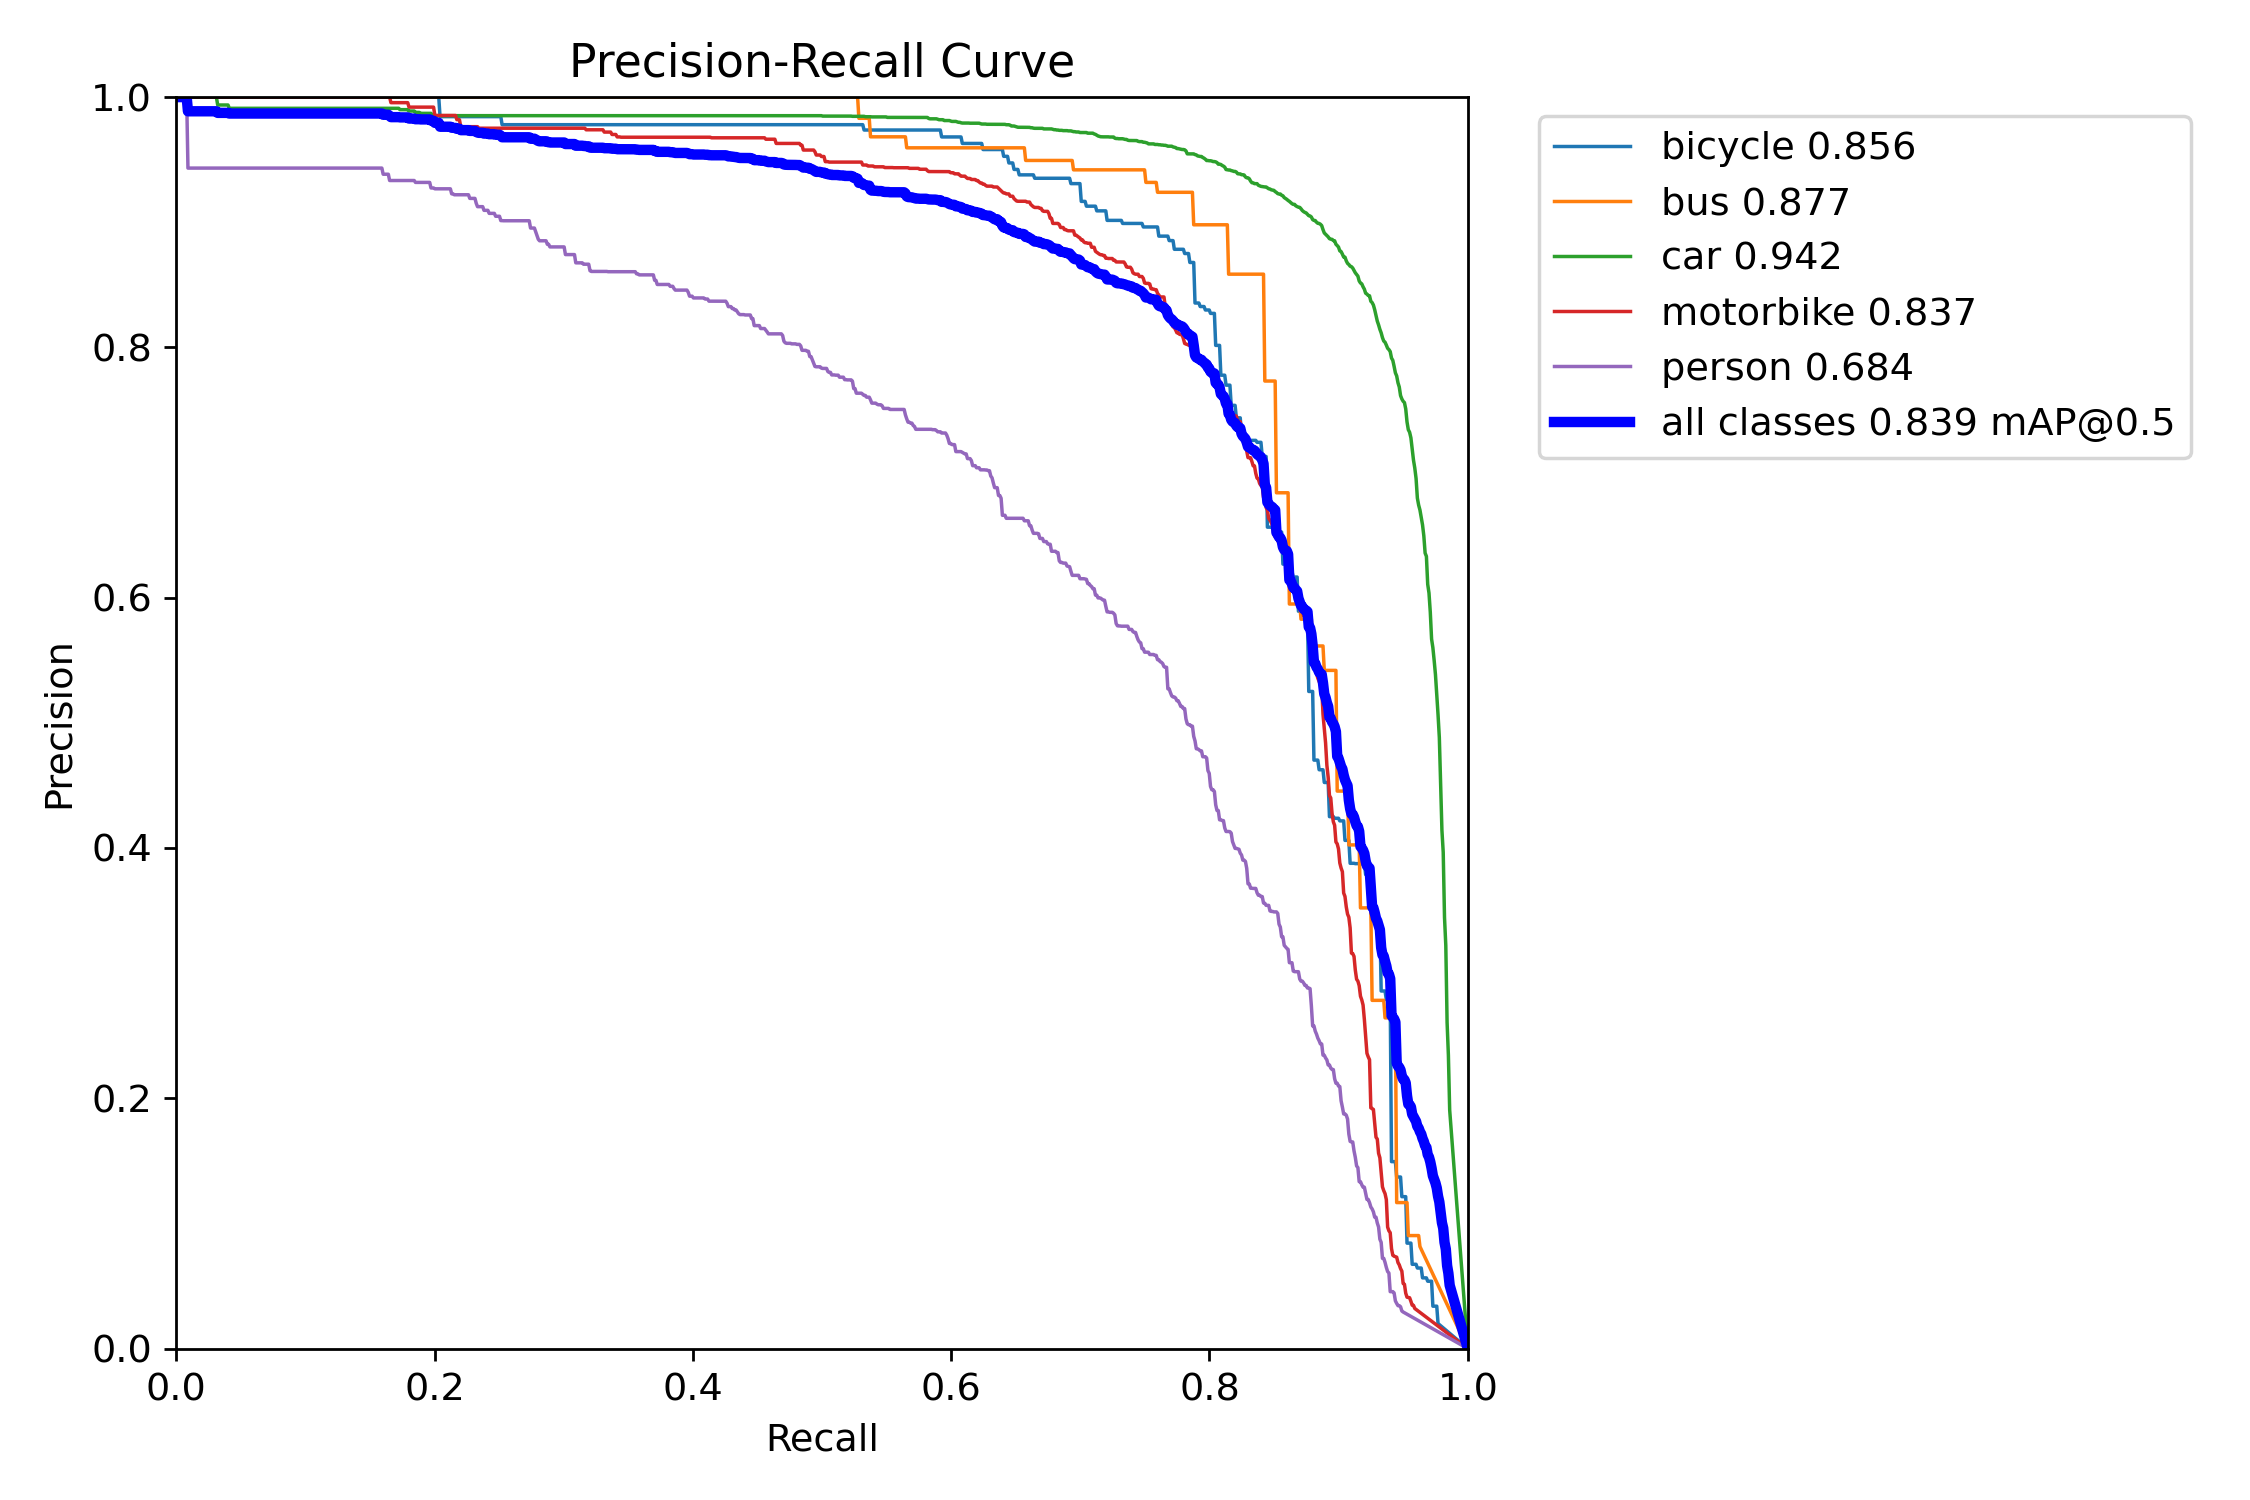

In [6]:
Image(filename = "/kaggle/working/runs/detect/train2/PR_curve.png", width = 600)

In [12]:
model_path = "runs/detect/train/weights/best.pt"
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to runs/detect/train/weights/best.pt


In [13]:
from IPython.display import FileLink

# Display a download link for the model file
FileLink(runs/detect/train/weights/best.pt)

NameError: name 'runs' is not defined

In [11]:

plt.figure(figsize=(8, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color='skyblue')
plt.ylabel("Score")
plt.title("Validation Metrics Overview")
plt.show()


NameError: name 'metrics_dict' is not defined

<Figure size 800x600 with 0 Axes>

In [8]:

metrics = model.val()  # Run validation and capture metrics if not already stored
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


FileNotFoundError: '/ultralytics/ultralytics/cfg/datasets/coco.yaml' does not exist

In [9]:


import matplotlib.pyplot as plt

# Example: Extract and plot main metrics from the metrics dictionary
metrics_dict = {
    "Precision (P)": metrics.box.map['all']['P'],
    "Recall (R)": metrics.box.map['all']['R'],
    "mAP@50": metrics.box.map['all']['mAP50'],
    "mAP@50-95": metrics.box.map['all']['mAP50-95']
}

IndexError: invalid index to scalar variable.

In [10]:

plt.figure(figsize=(8, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color='skyblue')
plt.ylabel("Score")
plt.title("Validation Metrics Overview")
plt.show()


NameError: name 'metrics_dict' is not defined

<Figure size 800x600 with 0 Axes>